In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [6]:
ticker = 'AMZN'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']
data.head()

,AMZN
Date,
2010-01-04,133.899994
2010-01-05,134.690002
2010-01-06,132.250000
2010-01-07,130.000000
2010-01-08,133.520004


In [7]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

,AMZN
Date,
2010-01-04,NaN
2010-01-05,0.005883
2010-01-06,-0.018282
2010-01-07,-0.017160
2010-01-08,0.026717


Text(0, 0.5, 'Frequency')

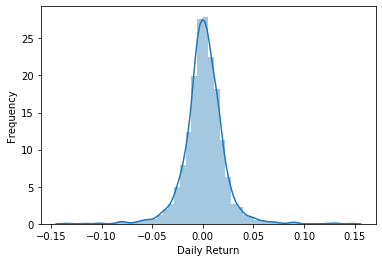

In [9]:
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

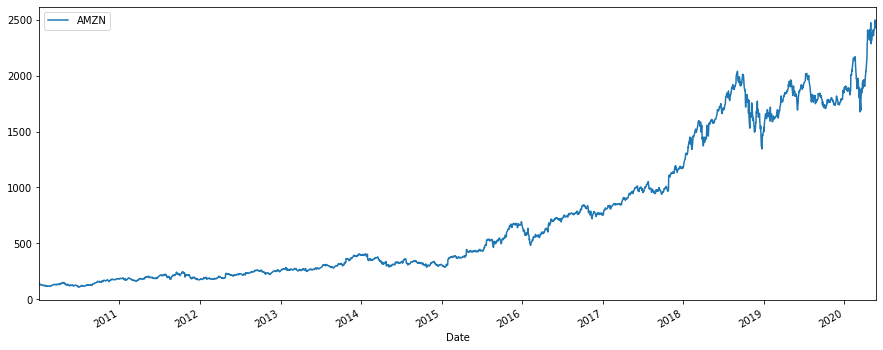

In [12]:
data.plot(figsize=(15,6))

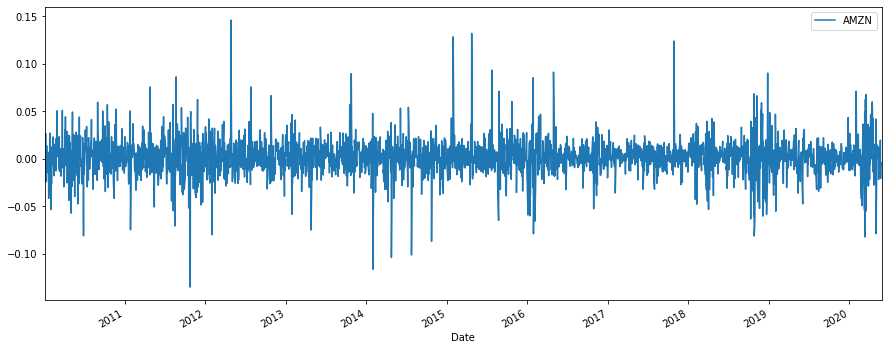

In [42]:
log_returns.plot(figsize=(15,6))

In [43]:
u = log_returns.mean()
var = log_returns.var()

$$
{drift} = {u} - \frac{1}{2} * {var}
$$

In [44]:
drift = u - (0.5*var)
drift

AMZN    0.000911
dtype: float64

In [45]:
stddev = log_returns.std()

In [46]:
x = np.random.rand(10,2)
x

array([[0.80375174, 0.68959913],
       [0.88293196, 0.08661742],
       [0.44717798, 0.28837015],
       [0.83220222, 0.89185279],
       [0.68588677, 0.45782938],
       [0.68925263, 0.99977784],
       [0.64984633, 0.36235923],
       [0.73782469, 0.20314429],
       [0.75154433, 0.46413201],
       [0.08318276, 0.25253788]])

In [47]:
norm.ppf(x)

array([[ 0.85509868,  0.49471438],
       [ 1.18977184, -1.36188288],
       [-0.13279443, -0.55815243],
       [ 0.9629043 ,  1.2364417 ],
       [ 0.48422464, -0.1059037 ],
       [ 0.49373302,  3.51225961],
       [ 0.38490562, -0.35215974],
       [ 0.63665343, -0.83044262],
       [ 0.67935755, -0.09002918],
       [-1.38397693, -0.66652472]])

In [48]:
Z = norm.ppf(np.random.rand(50,10000))
Z

array([[-0.37031329,  0.82989465, -0.97220865, ..., -0.17736205,
         0.30590754,  0.27300412],
       [-0.28193984,  1.88668318, -0.62958777, ..., -1.02519558,
        -1.27472627, -0.64066253],
       [ 0.13944492, -0.87730296, -0.18153025, ...,  0.29074868,
        -0.66988822,  0.47221162],
       ...,
       [-0.70208378, -0.60783032,  0.05534628, ..., -2.318125  ,
        -0.13071568, -0.41537625],
       [ 1.17257749, -0.66170869, -0.44273629, ...,  1.14119264,
         0.11249256,  1.95631764],
       [ 0.82724844, -0.0983025 , -1.14983594, ..., -0.30498123,
         1.70167149, -0.03751585]])

In [49]:
t_intervals = 1000
iterations = 10

$$
{daily}_{returns} = {e^r}
$$

$$
{r}={drift}+{stdev*z}
$$

In [50]:
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))

In [51]:
daily_returns

array([[0.99999069, 1.01073155, 0.97072007, ..., 0.99605322, 0.99296872,
        1.01275184],
       [1.01265367, 0.98189622, 0.99543423, ..., 0.97542726, 0.99819753,
        0.98007062],
       [1.01568659, 1.01617512, 0.97609947, ..., 0.96182701, 0.9932743 ,
        0.98962448],
       ...,
       [0.98602332, 1.00727693, 1.00836113, ..., 0.97143382, 0.98157878,
        1.01462182],
       [1.0092443 , 1.03802372, 1.00946037, ..., 1.02170592, 1.01566184,
        0.98987657],
       [0.98501009, 1.04440565, 0.9934305 , ..., 0.99893585, 1.05669338,
        0.99787355]])

---

In [52]:
S0 = data.iloc[-1]
S0

AMZN    2421.860107
Name: 2020-05-26 00:00:00, dtype: float64

In [72]:
price_list = np.zeros_like(daily_returns)

In [73]:
price_list.shape

(50, 1000)

In [74]:
price_list[0] = S0
price_list

array([[1383.93994141, 1383.93994141, 1383.93994141, ..., 1383.93994141,
        1383.93994141, 1383.93994141],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [76]:
for t in range(1,50):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [77]:
price_list.shape

(50, 1000)

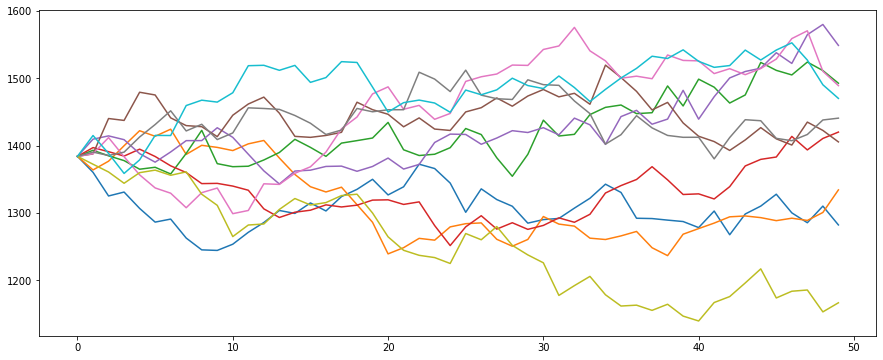

In [78]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

Text(0.5, 0, 'Price after 50 days')

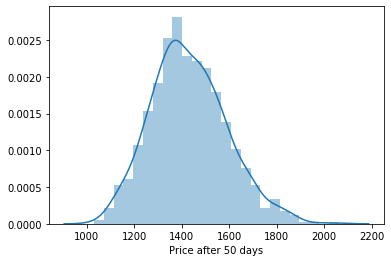

In [88]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Price after 50 days")

In [24]:
df = pd.DataFrame(price_list)

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,183.539993,183.539993,183.539993,183.539993,183.539993,183.539993,183.539993,183.539993,183.539993,183.539993
1,188.639146,178.687512,192.848403,191.342751,189.466336,184.749661,185.678049,178.587161,186.485112,186.824595
2,195.059510,180.821540,197.204729,188.263629,198.904157,194.823822,190.975932,184.287075,180.839171,191.489478
3,204.383851,184.326163,203.052532,198.411030,195.751831,190.061783,197.405131,186.859239,181.024014,184.317673
4,210.444237,184.698554,216.168972,191.603599,191.936270,192.369758,187.830022,186.472876,176.472906,186.732931


In [26]:
import seaborn as sns

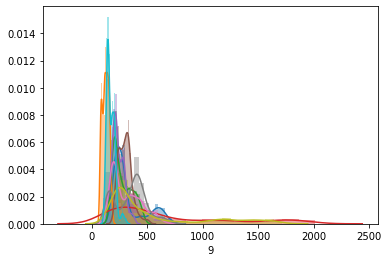

In [27]:
for i in range(len(df.columns)):
    sns.distplot(df[i])